# Projeto Clustering - SI

## Grupo:
Caio Possidio(cpv) <br>
Felipe Neiva(fnls) <br>
Frederick Almeida(fal5)

## Dataset:

https://archive.ics.uci.edu/dataset/109/wine

Dados do resultado de uma análise química de vinhos cultivados na mesma região da Itália, mas derivados de três cultivares diferentes. A análise determinou as quantidades de 13 constituintes encontrados em cada um dos três tipos de vinhos.



## KMeans

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics
from sklearn.decomposition import PCA

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
dataset = pd.read_csv(url, header=None)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [18]:
dataset.describe(include = "all")

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

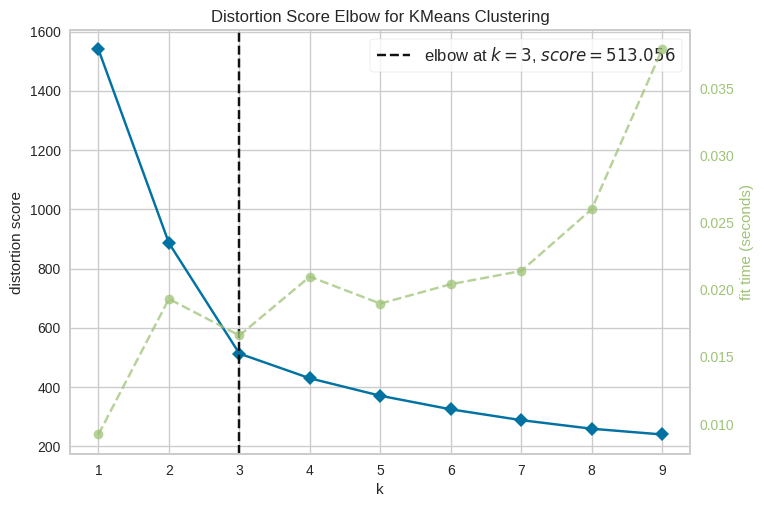

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
# separando features e target
features = dataset.iloc[:, 1:14]
target = dataset.iloc[:, 0]

# Convertendo o dataframe para uma matriz NumPy e atribui o tipo float aos dados
data = features.values
X = data.astype(float)

# Normalizando utilizando Z-score
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Converter de volta para dataframe
df_normalized = pd.DataFrame(X)

# Criando uma instancia do modelo PCA com 3 componentes
pca = PCA(n_components=3)

# Ajustando o modelo aos dados
X_pca = pca.fit_transform(X)

# Transformando o modelo de PCA em um dataframe
df_pca = pd.DataFrame(X_pca)

# escolhendo o modelo
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 10))

# escolhendo a quantidade de clusters
visualizer.fit(df_pca)
visualizer.poof()

### Por meio do elbow method, nós encontramos que a quantidade ideal de clusters deve ser 3.

In [20]:
# Treinando o modelo com 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_pca)
cluster_labels = kmeans.fit_predict(df_pca)

# printando os centros dos clusters
kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[-7.27201401e-02,  1.77754410e+00,  1.92644149e-01],
       [ 2.27580813e+00, -8.94517592e-01, -2.15032202e-03],
       [-2.72003575e+00, -1.12565126e+00, -2.39093241e-01]])

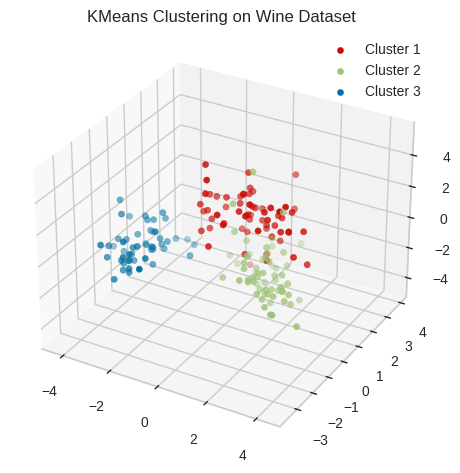

In [21]:
# Plotando
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b']

for j in range(3):
    cluster_indices = np.where(cluster_labels == j)[0]
    ax.scatter(df_pca.iloc[cluster_indices, 0], df_pca.iloc[cluster_indices, 1], df_pca.iloc[cluster_indices, 2],
               c=colors[j], label=f'Cluster {j + 1}', marker='o')

ax.legend()
plt.title('KMeans Clustering on Wine Dataset')
plt.show()

In [22]:
# medindo o desempenho pelo coeficiente de silhouette
silhouette_avg = metrics.silhouette_score(df_pca, cluster_labels)
print("Silhouette cofficient do clustering: " + str(silhouette_avg))

Silhouette cofficient do clustering: 0.4532351215683952


In [23]:
from sklearn.metrics.cluster import contingency_matrix

# calculando a pureza do nosso clustering
def purity_score(y_true, y_pred):
  contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
  return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

purity = purity_score(target, cluster_labels)
print("Pureza: ", purity)

Pureza:  0.9606741573033708
